### Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


car_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", 
                       names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'CAR'])
         
print(car_data.head())
print(car_data.info())

  buying  maint doors persons lug_boot safety    CAR
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
CAR         1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None


### Print out unique values in each column of object type to see what kind of values they take.

In [2]:
for column in car_data.columns:
    print(car_data[column].unique())
    print("-"* 50)

['vhigh' 'high' 'med' 'low']
--------------------------------------------------
['vhigh' 'high' 'med' 'low']
--------------------------------------------------
['2' '3' '4' '5more']
--------------------------------------------------
['2' '4' 'more']
--------------------------------------------------
['small' 'med' 'big']
--------------------------------------------------
['low' 'med' 'high']
--------------------------------------------------
['unacc' 'acc' 'vgood' 'good']
--------------------------------------------------


### Convert the values to numeric - Encode the object as an enumerated type or categorical variable using pd.factorize

In [3]:
car_data['buying'],b_values = pd.factorize(car_data['buying'])
print(car_data['buying'].unique())

[0 1 2 3]


In [4]:
car_data['maint'],m_values = pd.factorize(car_data['maint'])
print(car_data['maint'].unique())

[0 1 2 3]


In [5]:
car_data['doors'],d_values = pd.factorize(car_data['doors'])
print(car_data['doors'].unique())

[0 1 2 3]


In [6]:
car_data['persons'],p_values = pd.factorize(car_data['persons'])
print(car_data['persons'].unique())

[0 1 2]


In [7]:
car_data['lug_boot'],l_values = pd.factorize(car_data['lug_boot'])
print(car_data['lug_boot'].unique())

[0 1 2]


In [8]:
car_data['safety'],s_values = pd.factorize(car_data['safety'])
print(car_data['safety'].unique())

[0 1 2]


In [9]:
car_data['CAR'],c_values = pd.factorize(car_data['CAR'])
print(car_data['CAR'].unique())


[0 1 2 3]


In [10]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
CAR         1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB
None


### Select the predictor and target variables

In [11]:
X = car_data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
Y = car_data['CAR']

### Create the model and fit the data on it

k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9


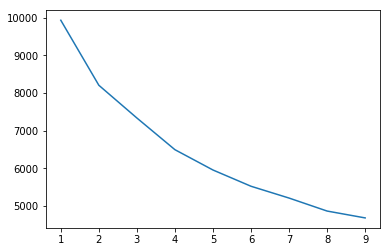

In [12]:
'''
    parameters:
    -data: pandas DataFrame (data to be fitted)
    -maxK (default = 10): integer (maximum number of clusters with which to run k-means)
    -seed_centroids (default = None): float (initial values of centroids for k-means)
'''
def elbow_plot(data, maxK=40, seed_centroids=None):
    sse = {}
    for k in range(1, maxK):
        print("k: ", k)
        if seed_centroids is not None:
            seeds = seed_centroids.head(k)
            kmeans = KMeans(n_clusters=k, max_iter=500, n_init=100, random_state=0, init=np.reshape(seeds, (k,1))).fit(data)
            data["clusters"] = kmeans.labels_
        else:
            kmeans = KMeans(n_clusters=k, max_iter=300, n_init=100, random_state=0).fit(data)
            data["clusters"] = kmeans.labels_
        # Inertia: Sum of distances of samples to their closest cluster center
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.show()
    return



elbow_plot(X, maxK=10)

In [13]:
model = KMeans(n_clusters=2, random_state=0)
kmeans = model.fit(X)

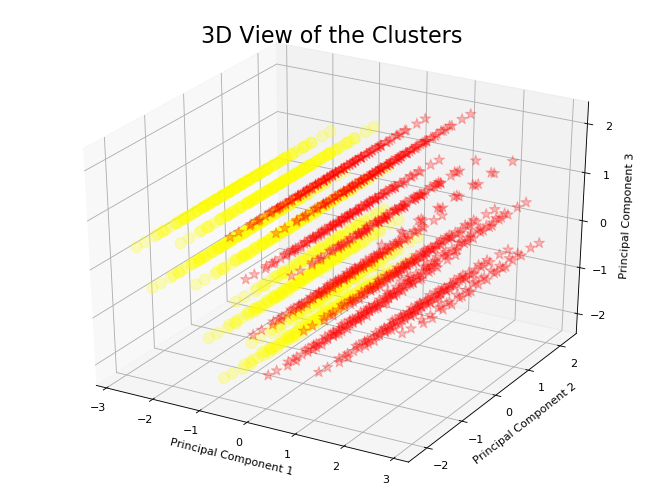

In [14]:


fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
        
x = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)

new_features = pca.fit_transform(x)
new_dataset = pd.DataFrame(data = new_features,
              columns = ['principal component 1', 'principal component 2', 'principal component 3'])

#targets = [0, 1, 2, 3]
targets = [0,1]
colors = ['red', 'yellow', 'm', 'c']
markers = ['*', 'o', '*', 'o']
for target, color, marker in zip(targets,colors, markers):
    indices_target = kmeans.labels_ == target
    xs = new_dataset.loc[indices_target, 'principal component 1']
    ys = new_dataset.loc[indices_target, 'principal component 2']
    zs = new_dataset.loc[indices_target, 'principal component 3']
    ax.scatter(xs, ys, zs, c=color, marker=marker, s = 100, alpha = 0.25)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D View of the Clusters', fontsize = 20)

plt.show()
    

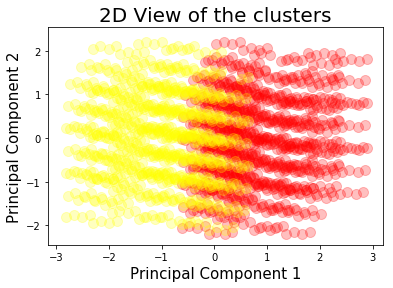

In [15]:
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2D View of the clusters', fontsize = 20)

#targets = [0,1,2,3]
targets = [0,1]
colors = ['red', 'yellow', 'm', 'c']
for target, color in zip(targets,colors):
    indices_target = kmeans.labels_ == target
    plt.scatter(new_dataset.loc[indices_target, 'principal component 1']
               , new_dataset.loc[indices_target, 'principal component 2']
               , c = color
               , s = 100, alpha = 0.25)
    
plt.show()    


### Report metrics on algorithm performance

In [16]:
correct_labels = sum(Y == kmeans.labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, Y.size))

Result: 806 out of 1728 samples were correctly labeled.
